In [155]:

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


plt.style.use('ggplot')



# 1. Import file

In [156]:
df = pd.read_csv(r"C:\Users\User\Desktop\mini-project\public_150k_plus_230101.csv")

df.info()
dfrow , dfcolumn  = df.shape
print(f'Row = {dfrow} , Column = {dfcolumn}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

# 2. Wrangler,Cleansing Data

In [157]:
#find NaN in data
null_percentages = df.isna().sum() / len(df) * 100
null_columns = null_percentages[null_percentages > 80].index.tolist()

print(f"Column have NaN more than 80% = {null_columns}")

Column have NaN more than 80% = ['FranchiseName', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'NonProfit']


2.1 drop column have NaN more than 80% and column UTILITIES_PROCESS

In [158]:
# drop column have NaN more than 80%
df = df.drop(['FranchiseName', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'NonProfit','UTILITIES_PROCEED'],axis=1)

In [159]:
df.isnull().sum()

LoanNumber                         0
DateApproved                       0
SBAOfficeCode                      0
ProcessingMethod                   0
BorrowerName                       4
BorrowerAddress                   14
BorrowerCity                      12
BorrowerState                     13
BorrowerZip                       13
LoanStatusDate                 37667
LoanStatus                         0
Term                               0
SBAGuarantyPercentage              0
InitialApprovalAmount              0
CurrentApprovalAmount              0
UndisbursedAmount                 47
ServicingLenderLocationID          0
ServicingLenderName                0
ServicingLenderAddress             0
ServicingLenderCity                0
ServicingLenderState               0
ServicingLenderZip                 0
RuralUrbanIndicator                0
HubzoneIndicator                   0
LMIIndicator                       0
BusinessAgeDescription             1
ProjectCity                       13
P

In [160]:
df = df.dropna()

In [161]:
df.isna().sum()
dfrow , dfcolumn  = df.shape
print(f'Row = {dfrow} , Column = {dfcolumn}')

Row = 916738 , Column = 45


In [162]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"916,738.00","916,738.00"
mean,"530,606.79","528,933.92"
std,"734,838.50","728,620.50"
min,0.00,"150,000.00"
25%,"200,644.19","200,800.00"
50%,"296,041.00","295,843.18"
75%,"541,696.50","540,522.00"
max,"10,000,000.00","10,000,000.00"


<AxesSubplot: >

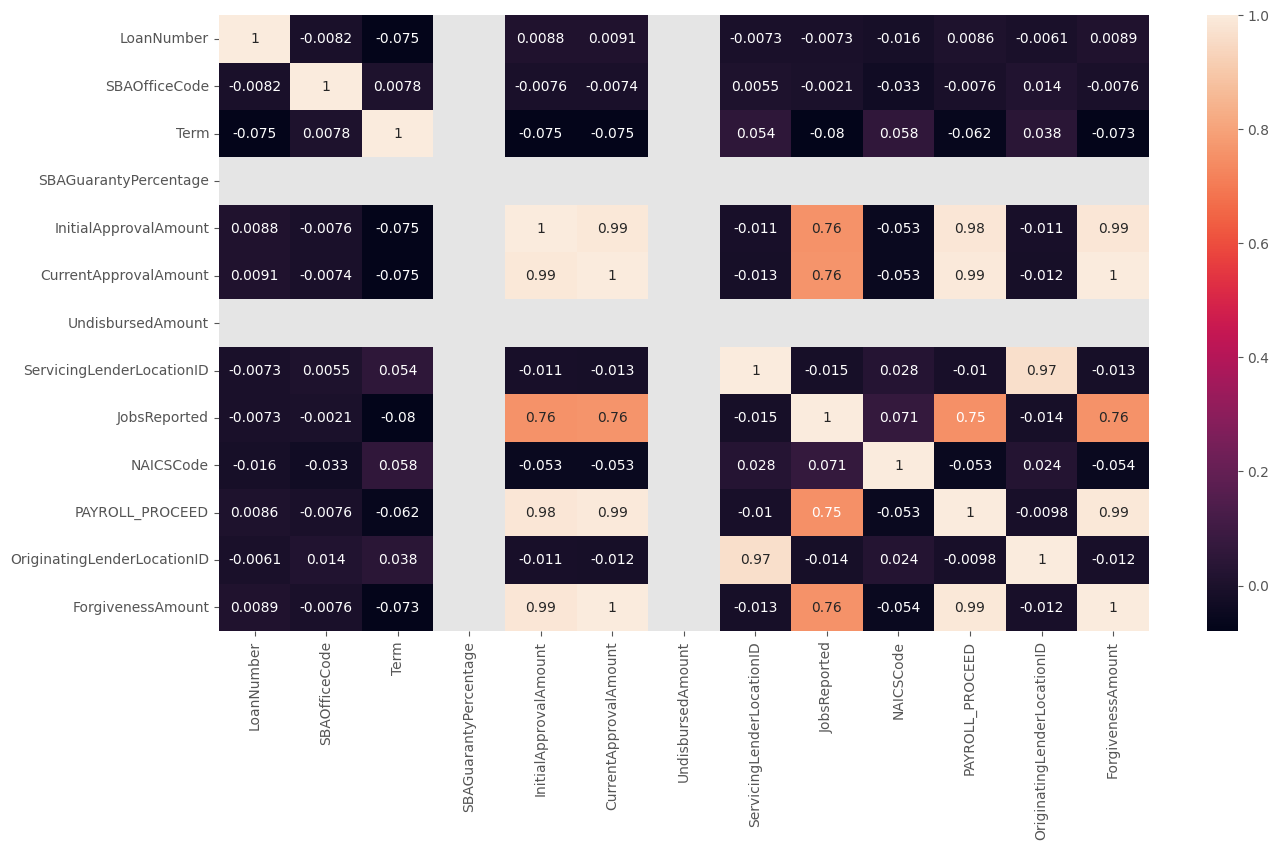

In [163]:
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True)

In [205]:
#change scientific notation to decimal 2 number
pd.options.display.float_format = "{:,.2f}".format
aggegate_ini = df['InitialApprovalAmount'].agg(['mean','count','max','min'])
aggegate_cur = df['CurrentApprovalAmount'].agg(['mean','count','max','min'])
aggegate_jobs = df['JobsReported'].agg(['mean','count','max','min'])

print(aggegate_ini)

print("\n--------------------------------------------\n")

print(aggegate_cur)

print("\n--------------------------------------------\n")

print(aggegate_jobs)

mean      459,384.52
count     879,666.00
max     3,719,750.00
min       150,042.00
Name: InitialApprovalAmount, dtype: float64

--------------------------------------------

mean      457,754.59
count     879,666.00
max     2,589,201.00
min       151,801.00
Name: CurrentApprovalAmount, dtype: float64

--------------------------------------------

mean         47.05
count   879,666.00
max         500.00
min           0.00
Name: JobsReported, dtype: float64


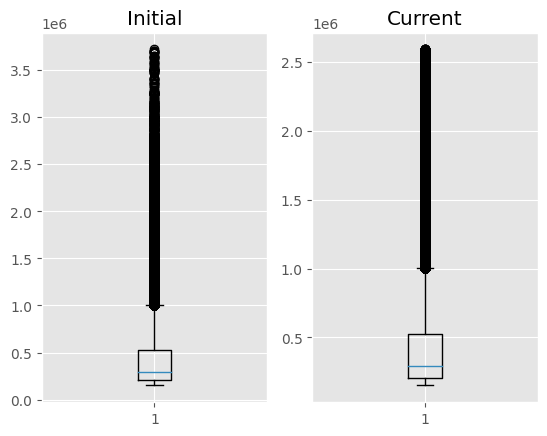

In [208]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()




In [167]:
#remove outliner
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.01)
    q_hi  = df[column_name].quantile(0.99)
    df_filtered = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
    return df_filtered

df = filter_outliner(df,'InitialApprovalAmount')
df = filter_outliner(df,'CurrentApprovalAmount')


In [203]:
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount,JobsReported
count,"879,666.00","879,666.00","879,666.00"
mean,"459,384.52","457,754.59",47.05
std,"416,937.31","413,490.95",53.62
min,"150,042.00","151,801.00",0.00
25%,"203,500.00","203,200.00",18.00
50%,"296,279.16","295,722.00",30.00
75%,"524,737.00","523,459.50",53.00
max,"3,719,750.00","2,589,201.00",500.00


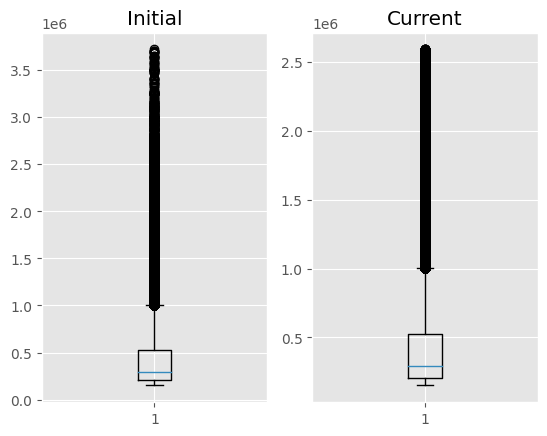

In [169]:
#boxplox looking for remove outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()



<AxesSubplot: xlabel='JobsReported'>

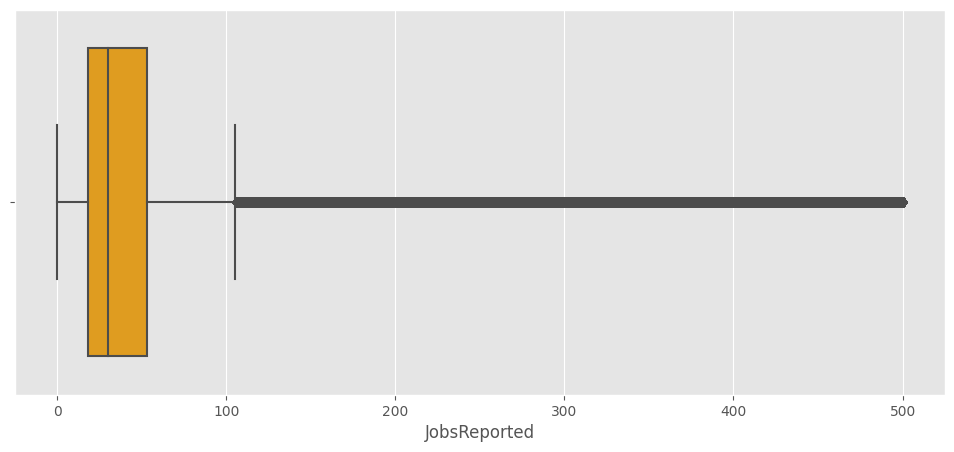

In [218]:
plt.figure(figsize=(12,5))
sns.boxplot(x = 'JobsReported' , data= df ,color= 'orange')


In [196]:
#เพิ่ม column ช่วงของเงินที่ยืมไป
df['LoanRange'] = pd.cut(df['CurrentApprovalAmount'], 
                             bins = [0, 350000, 500000, 1000000, 2000000, float('inf')], 
                             labels = ['Less than 350K', '350K - 500K', '500K - 1m', '1m - 2m', 'More than 2m'])
df['LoanRange'].unique()

['More than 2m', '1m - 2m', '500K - 1m', '350K - 500K', 'Less than 350K']
Categories (5, object): ['Less than 350K' < '350K - 500K' < '500K - 1m' < '1m - 2m' < 'More than 2m']

<Figure size 1500x600 with 0 Axes>

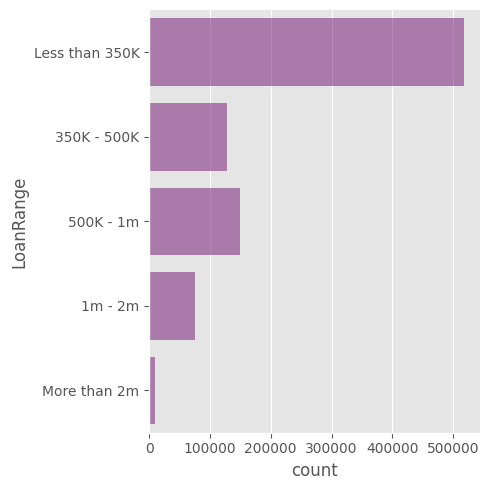

In [219]:
plt.figure(figsize = (15,6))
ax=sns.catplot(y='LoanRange', data=df ,kind= 'count' ,color = 'purple' ,alpha = 0.5)

In [217]:
# ดูว่าจำนวน ที่มีพนักงานมากที่สุด เป็น business type อะไร จำนวนเงินกู้อยู่ในช่วงไหนมัน
df_column_fillter = df[['BorrowerName','BorrowerCity','BorrowerState','JobsReported','LoanRange','BusinessType']].sort_values(by = 'JobsReported' , ascending=False).reset_index(drop = True)

df_column_fillter.head()

,BorrowerName,BorrowerCity,BorrowerState,JobsReported,LoanRange,BusinessType
0,SUMMIT SUBWAY LLC,COLORADO SPRINGS,CO,500.00,1m - 2m,Limited Liability Company(LLC)
1,MCKINNEY RESTAURANT I LLC,MAGNOLIA,TX,500.00,1m - 2m,Limited Liability Company(LLC)
2,WCD SERVICES CORP,MASPETH,NY,500.00,Less than 350K,Corporation
3,THE ARC OF CRAWFORD COUNTY INC,MEADVILLE,PA,500.00,1m - 2m,Non-Profit Organization
4,PUBLICK PIZZA CORP,BROOKLYN,NY,500.00,Less than 350K,Subchapter S Corporation


In [201]:
df_column_fillter.tail()

,BorrowerName,BorrowerCity,BorrowerState,JobsReported,LoanRange,BusinessType
968493,SOURCE EQUIPMENT,CASPER,WY,10.00,Less than 350K,Subchapter S Corporation
968494,ENERGY CONSTRUCTION OF WYOMING LLC,CHEYENNE,WY,18.00,Less than 350K,Limited Liability Company(LLC)
968495,TRU-TECH PRODUCTS LLC,WRIGHT,WY,19.00,Less than 350K,Limited Liability Company(LLC)
968498,JH THAI LLC,JACKSON,WY,19.00,Less than 350K,Subchapter S Corporation
968499,LAXMI HOSPITALITY LLC,ROCK SPRINGS,WY,19.00,Less than 350K,Limited Liability Company(LLC)


## Top 10 ของรัฐที่กู้เงินมากที่สุด


Text(0.5, 1.0, 'Top 10 State for PPP and PPE')

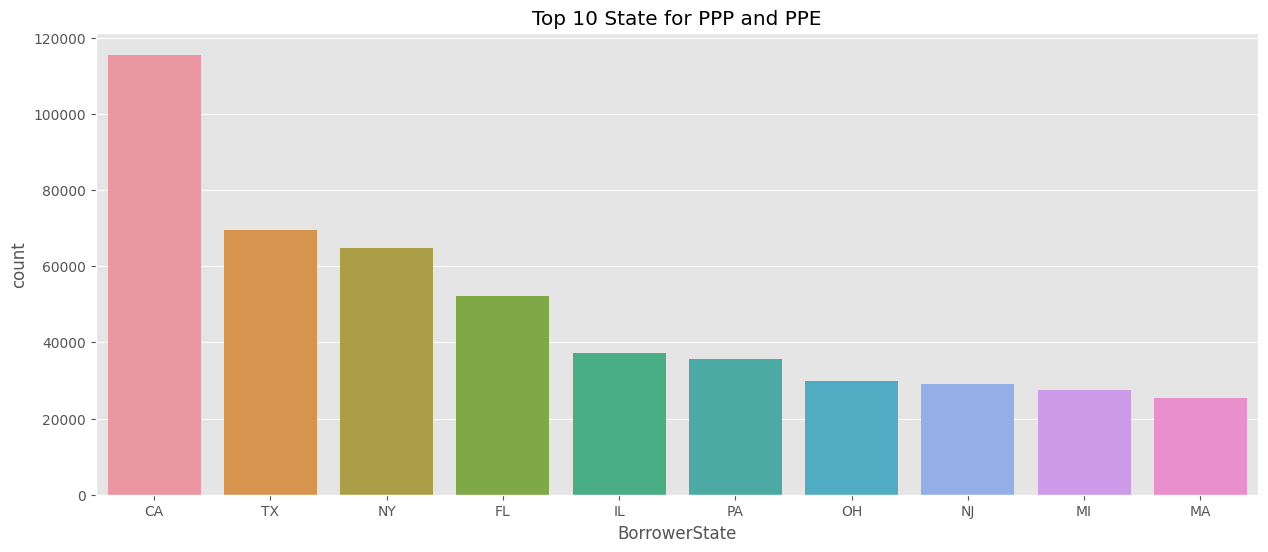

In [171]:
plt.figure(figsize = (15,6))
ax=sns.countplot(x="BorrowerState", data=df ,order = df['BorrowerState'].value_counts().index[:10], )
plt.title("Top 10 State for PPP and PPE")


สรุปได้ว่าที่เมือง CA = California มีจำนวนบริษัท ที่ใช้ บริการ PPE มากที่สุด

In [172]:
# ใน column มี ชื่อเหมือนกัน เช่น NEW YORK , NEW YORK
df['BorrowerCity'] = df['BorrowerCity'].str.upper()

In [173]:
# change datatype of date to datetime 
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# check the format column
df.head(10)['DateApproved']

58   2020-04-13
59   2020-04-05
60   2020-04-06
61   2020-04-12
62   2020-04-08
63   2020-05-01
64   2020-04-09
65   2020-04-11
66   2020-04-08
67   2020-05-06
Name: DateApproved, dtype: datetime64[ns]

# Q1 : ค่าเฉลี่ยของเงินที่ยืมไปในแต่ละพื้นที่ว่าในแต่ละรัฐ รัฐไหนยืมมากที่สุดเรียงตามลำดับ

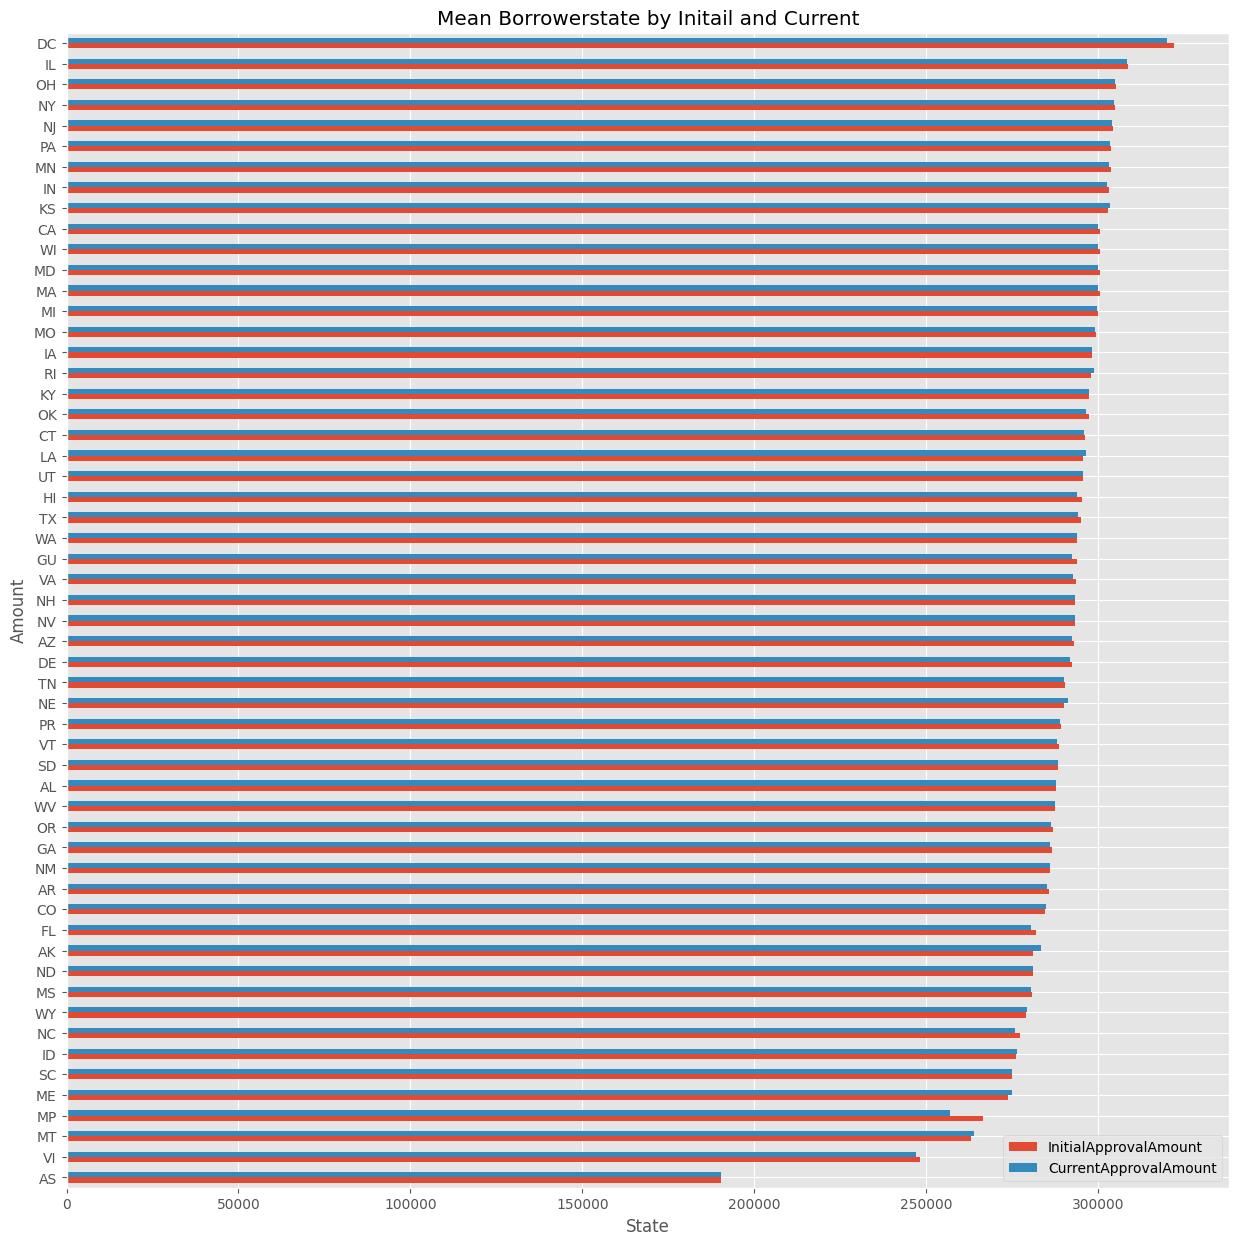

In [174]:
q1 = df.groupby("BorrowerState")['InitialApprovalAmount','CurrentApprovalAmount'].apply(lambda x : x.median()).sort_values(by = ["InitialApprovalAmount",'CurrentApprovalAmount'],ascending=True).plot(kind = 'barh' , figsize = (15,15)    )

plt.title('Mean Borrowerstate by Initail and Current')
plt.xlabel('State')
plt.ylabel('Amount')
plt.show()
    

<AxesSubplot: xlabel='count', ylabel='OriginatingLender'>

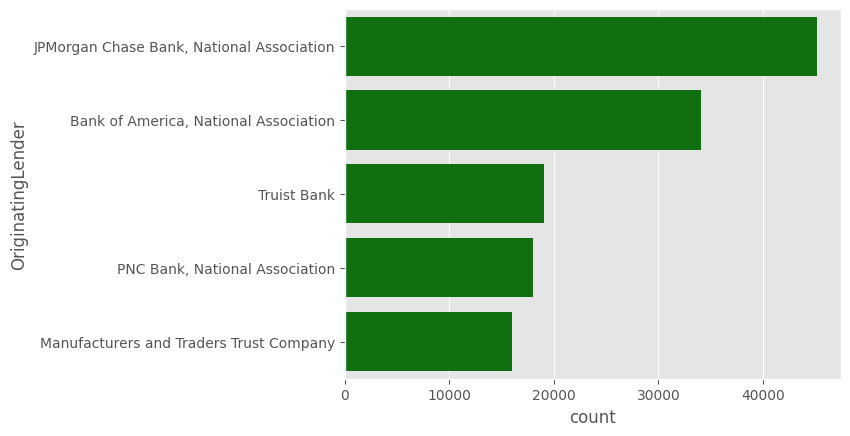

In [175]:
# Top 5 ธนาคารอะไรที่ให้กู้ยืมมากที่สุด
sns.countplot(data = df, y = 'OriginatingLender', order = df['OriginatingLender'].value_counts().index[:5], color = 'Green')

In [184]:
# filter ดูว่าบริษัทของเงินที่ยืมไปที่มีค่าเฉลี่ยอยู่ที่ใด
df_column_fillter = df[['BorrowerName','BorrowerCity','BorrowerState','JobsReported','CurrentApprovalAmount']]


df_column_AS = df.loc[df['BorrowerState'] == 'DC',['BorrowerName','BorrowerCity','BorrowerState','OriginatingLender','JobsReported','CurrentApprovalAmount']].sort_values('CurrentApprovalAmount' , ascending= False ).reset_index(drop=True)

df_column_AS.head()

,BorrowerName,BorrowerCity,BorrowerState,OriginatingLender,JobsReported,CurrentApprovalAmount
0,"TED'S BULLETIN HOLDINGS, LLC",WASHINGTON,DC,Sandy Spring Bank,475.00,"2,577,300.00"
1,AMERICAN UNIVERSITY D/B/A WAMU 88.5,WASHINGTON,DC,"Capital One, National Association",125.00,"2,571,532.00"
2,PREMIUM SELECT HOME CARE INC,WASHINGTON,DC,"Bank of America, National Association",485.00,"2,562,398.00"
3,UNIDOSUS,WASHINGTON,DC,"Fulton Bank, National Association",170.00,"2,550,000.00"
4,HOLLINGSWORTH LLP,WASHINGTON,DC,Manufacturers and Traders Trust Company,141.00,"2,547,100.00"


<AxesSubplot: xlabel='count', ylabel='BusinessType'>

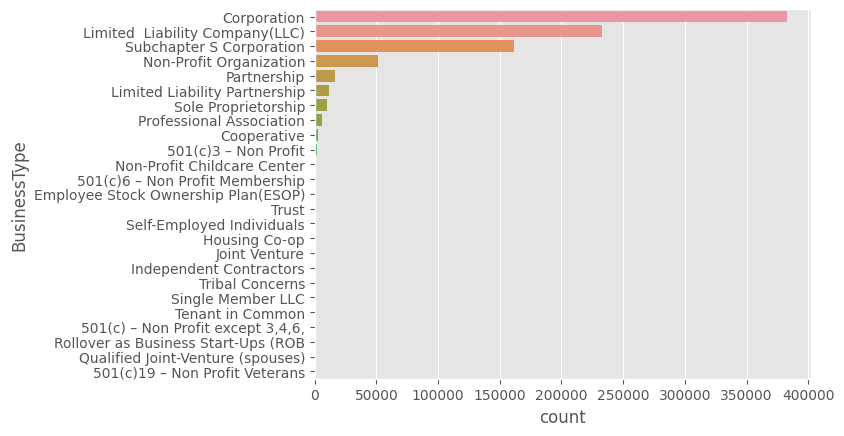

In [176]:
sns.countplot(data = df, y = 'BusinessType', order = df['BusinessType'].value_counts().index)

# Q2 ค่าเฉลี่ยของพนักงานในแต่ละรัฐ

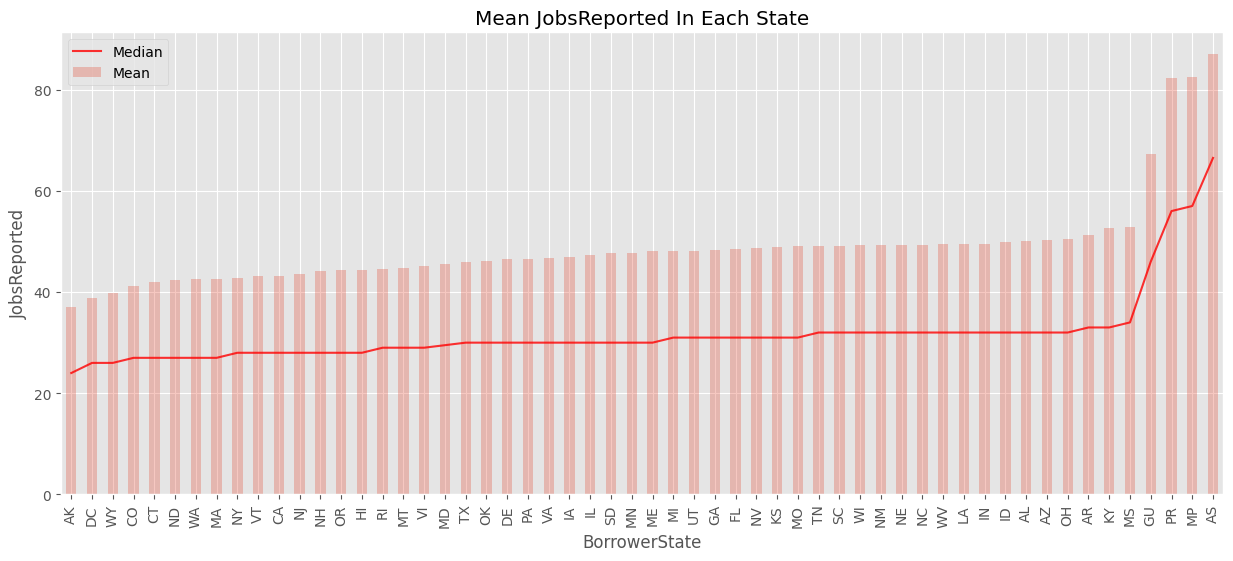

In [216]:

df.groupby("BorrowerState")['JobsReported'].mean().sort_values().plot(
    kind="bar",
    title = "Mean JobsReported  In Each State",
    alpha = 0.3,
    legend=True,
)

df.groupby("BorrowerState")["JobsReported"].median().sort_values().plot(
    kind="line",
    title = "Mean JobsReported In Each State",
    legend=True,
    color="red",
    rot=90,
    alpha=.8,
    figsize=(15,6) # Determines the size 
)
plt.ylabel("JobsReported") 
plt.legend(["Median", "Mean"]);

จาก กราฟ สรุปได้ว่า

เรามา fitter ดุว่าเราทำอะไรกับ ความสัมพันธ์กับ พนักงาน (employees) กับ รัฐ (state)

In [180]:
# มาดูกันว่าในรัฐที่มีค่าเฉลี่ยมากที่สุดหน้าตาเป็นยังไง
df_column_fillter = df[['BorrowerName','BorrowerCity','BorrowerState','JobsReported','CurrentApprovalAmount']]


df_column_AS = df.loc[df['BorrowerState'] == 'AS',['BorrowerName','BorrowerCity','BorrowerState','JobsReported','CurrentApprovalAmount']].sort_values('CurrentApprovalAmount' , ascending= False ).reset_index(drop=True)

df_column_AS.tail(20)







,BorrowerName,BorrowerCity,BorrowerState,JobsReported,CurrentApprovalAmount
0,PARAMOUNT BUILDERS LIMITED,PAGO PAGO,AS,161.00,"500,000.00"
1,NANA'S INC,PAGO PAGO,AS,104.00,"394,622.00"
2,AMERICAN SAMOA 2000 INC,PAGO PAGO,AS,151.00,"389,500.00"
3,"PETER E REID STEVEDORING, INC.",PAGO PAGO,AS,116.00,"276,073.06"
4,FORSGREN LTD. INC,PAGO PAGO,AS,68.00,"256,332.00"
5,OTTOVILLE INVESTMENTS ONE INC,PAGOPAGO,AS,96.00,"248,525.00"
6,CONGREGATION CHRISTIAN CHURCH IN AMERICAN SAMOA,PAGO PAGO,AS,57.00,"218,720.00"
7,HARBOR MARITIME & STEVEDORING CO INC,PAGO PAGO,AS,145.00,"211,477.00"
8,G.H.C.REID,PAGO PAGO,AS,56.00,"196,639.32"
9,MANUMALO BAPTIST SCHOOL INC,PAGO PAGO,AS,68.00,"183,750.00"
